In [596]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

df0 = pd.read_csv('Flow_meter_27-2_96pwm_16-02-25.csv', delim_whitespace=True, header=0 )
df1 = pd.read_csv('Flow_meter_17-5_144pwm_16-05-19.csv', delim_whitespace=True, header=0 )
df2 = pd.read_csv('Flow_meter_9-0_225pwm_16-06-45.csv', delim_whitespace=True, header=0 )
df3 = pd.read_csv('Flow_meter_17-6_205pwm_6469fps21-03-58.csv', delim_whitespace=True, header=0 )
df4 = pd.read_csv('Flow_meter_17-6_205pwm_2000fps18-44-23.csv', delim_whitespace=True, header=0 )


three_speeds_arr = [df2, df1, df0]
three_label_arr = ['9.0mm gate', '17.5mm gate','27.2mm gate']

mmppix = 0.007142
all_df_arr = [df0, df1, df2, df3, df4]
framerate_comp_arr = [df4, df3]
framerate_label_arr=['2000 fps', '6469 fps']


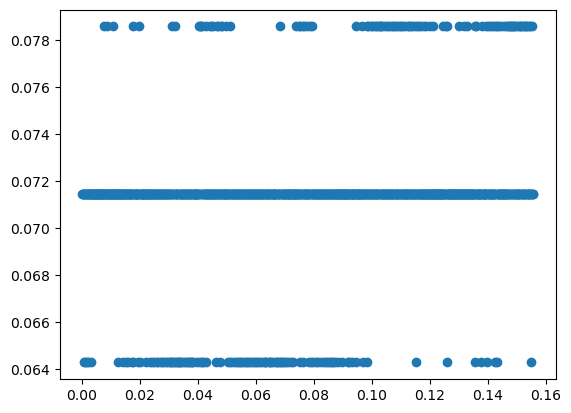

In [597]:
df = three_speeds_arr[0]
start_i = 0
plot_len = 995
df_plot = np.zeros((plot_len,6))    
time_acc = 0
np_df = df.to_numpy()

for i in range(0,plot_len):
    dt = np_df[start_i + i][0] / 1_000_000
    time_acc += dt
    df_plot[i][0] = time_acc
    #df_plot[i][1] = np_df[start_i + i][1] * mmppix
    #df_plot[i][2] = np_df[start_i + i][2] * mmppix
    dx = np_df[start_i + i][1] * mmppix
    dy = np_df[start_i + i][2] * mmppix
    dx_dt = dx/dt
    dy_dt = dy/dt
    df_plot[i] = [time_acc, dx, dy, dx_dt, dy_dt,np_df[i,6]]
plt.scatter(df_plot[:,0], df_plot[:,2])
plt.show()



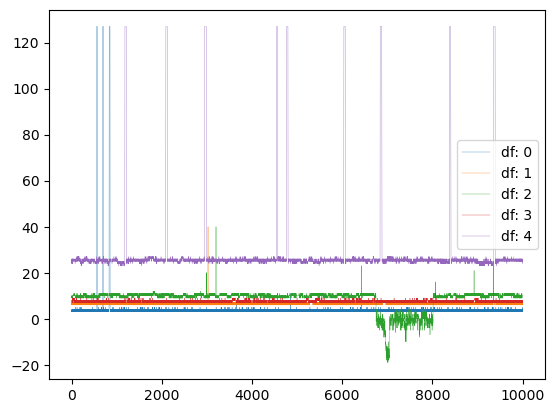

In [598]:
for i in range(len(all_df_arr)):
    df = all_df_arr[i]
    df_np = df.to_numpy()
    x = np.arange(0,len(df_np))
    plt.plot(x, df_np[:,2],
            linewidth = .25,
            label = 'df: ' + str(i))
plt.legend()
plt.show()

In [600]:
def velocity_plot(df_arr, label_arr, title, start_i, plot_len_arr):
    plot_num = 0
    piv_speed_arr = [50.23 ,30.5 ,17.3]
    piv_std_arr = [0.910881075419560,0.761892237895336,0.294116063762521]
    velocity_arr = []
    velocity_std_arr = []
    for df in df_arr:
        df_plot = np.zeros((plot_len_arr[plot_num],5))
        time_acc = 0
        np_df = df.to_numpy()
        for i in range(0,plot_len_arr[plot_num]):
            dt = np_df[start_i + i][0] / 1_000_000
            time_acc += dt
            df_plot[i][0] = time_acc
            #df_plot[i][1] = np_df[start_i + i][1] * mmppix
            #df_plot[i][2] = np_df[start_i + i][2] * mmppix
            dx = np_df[start_i + i][1] * mmppix / 10 #mm/cm
            dy = np_df[start_i + i][2] * mmppix / 10
            dx_dt = dx/dt
            dy_dt = dy/dt
            df_plot[i] = [time_acc, dx, dy, dx_dt, dy_dt]
        #plt.scatter(df_plot[:,0],df_plot[:,2],label=label_arr[plot_num])
        velocity_arr.append(np.mean(df_plot[:,4]))
        velocity_std_arr.append(np.std(df_plot[:,4]))

        plot_num +=1
    plt.errorbar(piv_speed_arr, velocity_arr,
                 yerr=velocity_std_arr,
                 xerr=piv_std_arr,
                 fmt='o',
                 markersize=5,
                 capsize=5,
                 elinewidth=.5)
    
    plt.title(title)
    plt.xlabel('PIV Measurement (cm/s)')
    plt.ylabel('Mouse Sensor Measurement (cm/s)')
    plt.grid()
    plt.plot(np.arange(15,55),np.arange(15,55), linestyle='--')
#    plt.show()
    plt.savefig(title)

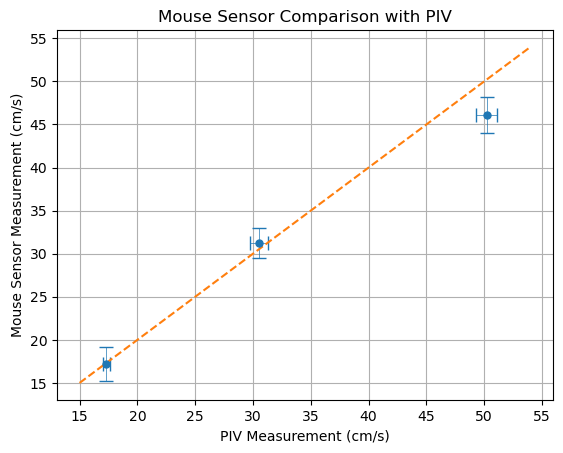

In [601]:
velocity_plot(three_speeds_arr, three_label_arr,'Mouse Sensor Comparison with PIV', 5000, [500,500,500])

In [602]:
def time_series_pix(df_arr, label_arr, title, start_i, plot_len_arr,color_arr):
    plot_num = 0
    for df in df_arr:
        df_plot = np.zeros((plot_len_arr[plot_num],3))    
        time_acc = 0
        np_df = df.to_numpy()
        dt_arr = []
        for i in range(0,plot_len_arr[plot_num]):
            dt = np_df[start_i + i][0] / 1_000_000
            time_acc += dt
            dt_arr.append(dt)
            df_plot[i][0] = time_acc * 1000
            df_plot[i][1] = np_df[start_i + i][1] 
            df_plot[i][2] = np_df[start_i + i][2] 
        
        dt_avg = np.mean(dt_arr)
        for row in df_plot:
            pass
            #row[1] = row[1] / dt_avg
            #row[2] = row[2] / dt_avg
        
        dy_avg = np.mean(df_plot[:,2])
        # plt.hlines(dy_avg,min(df_plot[:,0]),
        #            max(df_plot[:,0]), 
        #            label=(label_arr[plot_num]+' avg'),
        #            linestyle='--',color=color_arr[plot_num])
        
        plt.subplot(2,1,plot_num+1)
        plt.scatter(df_plot[:,0],df_plot[:,2],
                    #label=label_arr[plot_num],
                    s=5,
                    color=color_arr[plot_num])
        #plt.legend(loc='best')
        plt.title(label_arr[plot_num])
        plt.ylabel('displacement (mm)')
        plot_num +=1
    #plt.legend(loc='best')
    plt.suptitle(title)
    plt.xlabel('time (s)')
    
    plt.savefig(title)

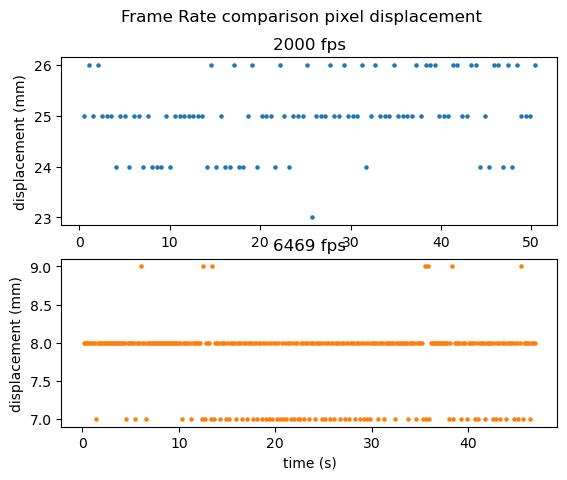

In [603]:
time_series_pix(framerate_comp_arr, framerate_label_arr,
                 'Frame Rate comparison pixel displacement',
                 1500, [100, 300],
                 ['#1f77b4','tab:orange'])

In [604]:
df3_start_i = 5000
df3_plot_len = 97

df3_np = df3.to_numpy()
df3_plot = np.zeros((df3_plot_len, 5))
df3_t_acc = 0
for i in range(0,df3_plot_len):
    dt = df3_np[df3_start_i + i][0] / 1_000_000
    df3_t_acc += dt*1000
    df3_plot[i][0] = dt
    df3_plot[i][1] = df3_t_acc
    df3_plot[i][2] = df3_np[df3_start_i + i][1] 
    df3_plot[i][3] = df3_np[df3_start_i + i][2] 


In [605]:
df4_start_i = 5000
df4_plot_len = 30

df4_np = df4.to_numpy()
df4_plot = np.zeros((df4_plot_len, 5))
df4_t_acc = 0
for i in range(0,df4_plot_len):
    dt = df4_np[df4_start_i + i][0] / 1_000_000
    df4_t_acc += dt*1000
    df4_plot[i][0] = dt
    df4_plot[i][1] = df4_t_acc
    df4_plot[i][2] = df4_np[df4_start_i + i][1] 
    df4_plot[i][3] = df4_np[df4_start_i + i][2] 


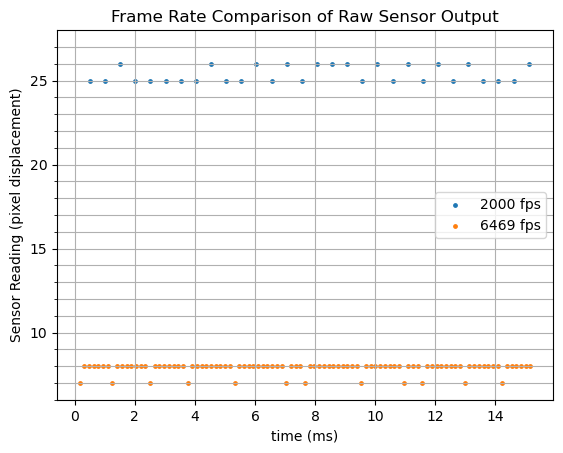

In [606]:
plt.scatter(df4_plot[:,1],df4_plot[:,3],
           s=6,
           color='tab:blue',
           label = '2000 fps')

plt.scatter(df3_plot[:,1],df3_plot[:,3],
           s=6,
           color='tab:orange',
           label='6469 fps')


plt.ylim(6,28)
plt.yticks(np.arange(10,26,step=5))
plt.yticks(np.arange(6,28,step=1), minor=True)
plt.title('Frame Rate Comparison of Raw Sensor Output')
plt.grid(which='both', axis='both')
plt.xlabel('time (ms)')
plt.ylabel('Sensor Reading (pixel displacement)')
plt.legend()
plt.savefig('frame_rate_comparison_raw_output')


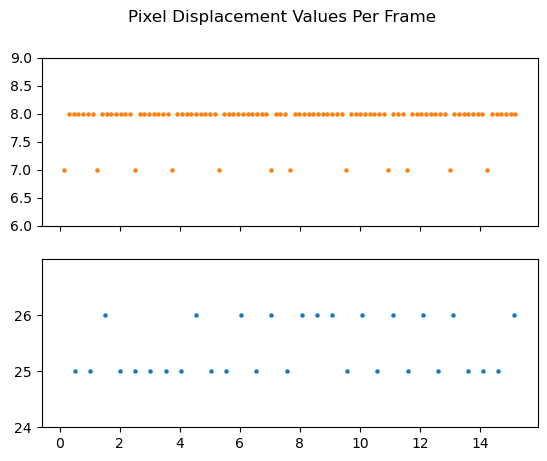

In [607]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.suptitle('Pixel Displacement Values Per Frame')
ax1.scatter(df3_plot[:,1],df3_plot[:,3],
           s=5,
           color='tab:orange')
ax1.set_ylim(6,9)
plt.yticks([6,7,8,9])
ax2.scatter(df4_plot[:,1],df4_plot[:,3],
           s=5,
           color='tab:blue')
ax2.set_ylim(24,27)
plt.yticks([24,25,26])
plt.savefig('pixel_displacement_val_per_frame')

In [608]:
def time_series_mmps(df_arr, label_arr, title, start_i, plot_len_arr,color_arr):
    plot_num = 0
    for df in df_arr:
        df_plot = np.zeros((plot_len_arr[plot_num],3))    
        time_acc = 0
        np_df = df.to_numpy()
        dt_arr = []
        for i in range(0,plot_len_arr[plot_num]):
            dt = np_df[start_i + i][0] / 1_000_000
            time_acc += dt *1000
            dt_arr.append(dt)
            df_plot[i][0] = time_acc
            df_plot[i][1] = np_df[start_i + i][1] * mmppix / 10 # mm/cm
            df_plot[i][2] = np_df[start_i + i][2] * mmppix / 10
        
        dt_avg = np.mean(dt_arr)
        for row in df_plot:
            row[1] = row[1] / dt_avg
            row[2] = row[2] / dt_avg
        plt.scatter(df_plot[:,0],df_plot[:,2],
                    label=label_arr[plot_num],
                    s=5,
                    color=color_arr[plot_num])
        dy_avg = np.mean(df_plot[:,2])
        plt.hlines(dy_avg,min(df_plot[:,0]),
                   max(df_plot[:,0]), 
                   label=(label_arr[plot_num]+' avg'),
                   linestyle='--',color=color_arr[plot_num])
        plot_num +=1
    plt.legend(loc='best')
    plt.title(title)
    plt.grid()
    plt.xlabel('Time (ms)')
    plt.ylabel('Velocity (cm/s)')
    plt.savefig(title)

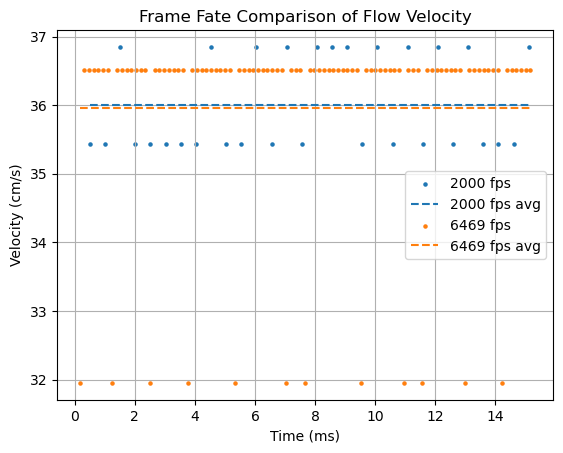

In [609]:
time_series_mmps(framerate_comp_arr, framerate_label_arr,
                 'Frame Fate Comparison of Flow Velocity',
                 5000, [30, 97],
                 ['#1f77b4','tab:orange'])